In [1]:
import simpy, random
from queue_simulation import ServiceOperation, SIMULATION_DURATION, SEED

In [2]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Initializing OpenUp Queue Simulation')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

random.seed(SEED) # comment out line if not reproducing results
queue_exceeded = []
max_queue_length = []
num_helpseekers = []
num_helpseekers_served = []
num_helpseekers_served_g_regular = []
num_helpseekers_served_g_repeated = []
num_helpseekers_reneged = []
num_helpseekers_reneged_g_regular = []
num_helpseekers_reneged_g_repeated = []
num_available_counsellor_processes = []
    
for i in range(1, 1501):
    # create environment
    env = simpy.Environment() 

    # set up service operation and run simulation until  
    S = ServiceOperation(env=env)
    env.run(until=SIMULATION_DURATION)

#     print(f'Iteration #{i} ')
      
    num_helpseekers.append(S.num_helpseekers)
    max_queue_length.append(S.helpseeker_queue_max_length)
    queue_exceeded.extend(S.times_queue_not_empty)
    num_available_counsellor_processes.extend(S.num_available_counsellor_processes)
    num_helpseekers_served.append(S.served)
    num_helpseekers_served_g_regular.append(S.served_g_regular)
    num_helpseekers_served_g_repeated.append(S.served_g_repeated)
    num_helpseekers_reneged.append(S.reneged)
    num_helpseekers_reneged_g_regular.append(S.reneged_g_regular)
    num_helpseekers_reneged_g_repeated.append(S.reneged_g_repeated)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initializing OpenUp Queue Simulation
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
sns.set();

In [5]:
num_helpseekers = pd.Series(num_helpseekers, name='number of helpseekers')
num_helpseekers_served = pd.Series(num_helpseekers_served, name='number of helpseekers served')
num_helpseekers_served_g_regular = pd.Series(num_helpseekers_served_g_regular, name='number of users served')
num_helpseekers_served_g_repeated = pd.Series(num_helpseekers_served_g_repeated, name='number of repeated users served')
num_helpseekers_reneged = pd.Series(num_helpseekers_reneged, name='number of helpseekers reneged')
num_helpseekers_reneged_g_regular = pd.Series(num_helpseekers_reneged_g_regular, name='number of users reneged')
num_helpseekers_reneged_g_repeated = pd.Series(num_helpseekers_reneged_g_repeated, name='number of repeated users reneged')
# queue_exceeded = pd.Series(queue_exceeded, name='number of instances queue exceeded four helpseekers')
max_queue_length = pd.Series(max_queue_length, name='max queue length')

In [6]:
# function to calculate classification confidence intervals
# parameter: stats - list of confidence intervals, which must be ordered
#            metadata - any string to annotate printout, can be None
# precondition - metadata must be a string or None, and stats must be a list
#                  The check is commented out for now as asserts should 
#               be done outside function
# returns: cutoff values at 2.5% and 95% percentiles
def calculate_confidence_intervals(stats, metadata=None):
    # if not isinstance(metadata, None) or \
    #     not isinstance(metadata, str) or \
    #     not isinstance(stats, list):
    #     return
        
    confidence_interval = .95 # 95 percent confidence level
    q_lower = .5 * (1 - confidence_interval)
    q_upper = confidence_interval + q_lower
        
    # convert to percentages
    q_lower = q_lower * 100
    q_upper = q_upper * 100
    confidence_interval = confidence_interval * 100
        
    #     print(q_lower, q_upper)
    lower_percentile = np.percentile(stats, q_lower)
    upper_percentile = np.percentile(stats, q_upper)
    mean = np.mean(stats)
        
    print('\n%s %d%% Confidence interval:' % (
        metadata, confidence_interval) )
    print('----------------------------')
    print('%.1f%% percentile: %.5f' % (q_lower, lower_percentile) )
    print('%.1f%% percentile: %.5f\n' % (q_upper, upper_percentile) )
    print('mean value: %.5f' % mean)
    return (lower_percentile, upper_percentile, mean)

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_distribution(series, filename):
    confidence_interval = .95 # 95 percent confidence level
    q_lower = .5 * (1 - confidence_interval)
    q_upper = confidence_interval + q_lower
        
    # convert to percentages
    q_lower = q_lower * 100
    q_upper = q_upper * 100
    confidence_interval = confidence_interval * 100
        
    #     print(q_lower, q_upper)
    lower_percentile = np.percentile(series, q_lower)
    upper_percentile = np.percentile(series, q_upper)
    mean = np.mean(series)
    
    
    fig, ax = plt.subplots(1, 1, figsize=(7, 5) )
    sns.distplot(series, ax=ax)
    ax.axvline(x=lower_percentile, linestyle='--' )
    ax.axvline(x=upper_percentile, linestyle='--' )
    ax.axvline(x=mean, linestyle=':', linewidth=2 )
    
    fig.savefig(f'{filename}.png', dpi=300, bbox_inches='tight')

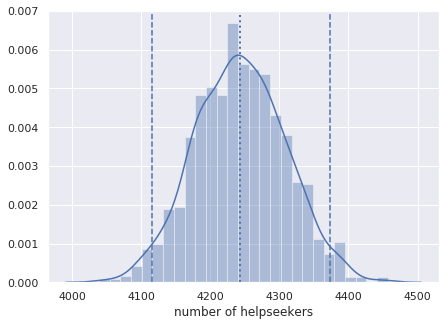

In [9]:
plot_distribution(num_helpseekers, 'num_helpseekers')

In [10]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 4115.95000
97.5% percentile: 4373.57500

mean value: 4243.58333


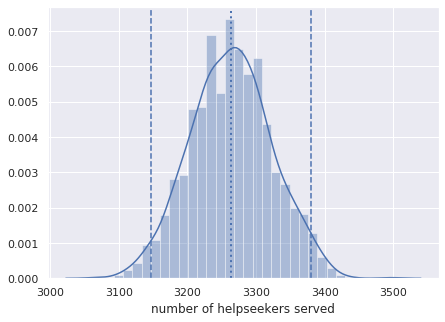

In [11]:
plot_distribution(num_helpseekers_served, 'num_helpseekers_served')

In [12]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_served.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 3147.47500
97.5% percentile: 3379.52500

mean value: 3263.78133


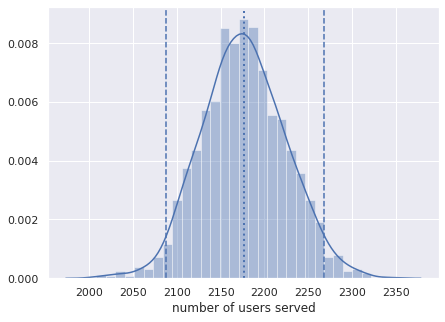

In [13]:
plot_distribution(num_helpseekers_served_g_regular, 'num_helpseekers_served_g_regular')

In [14]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_served_g_regular.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 2088.00000
97.5% percentile: 2268.52500

mean value: 2176.51067


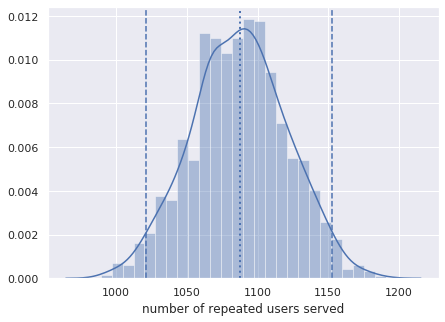

In [15]:
plot_distribution(num_helpseekers_served_g_repeated, 'num_helpseekers_served_g_repeated')

In [16]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_served_g_repeated.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 1021.47500
97.5% percentile: 1152.52500

mean value: 1087.27067


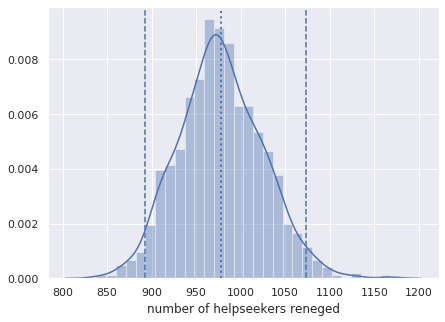

In [17]:
plot_distribution(num_helpseekers_reneged, 'num_helpseekers_reneged')

In [18]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_reneged.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 892.00000
97.5% percentile: 1073.00000

mean value: 977.54333


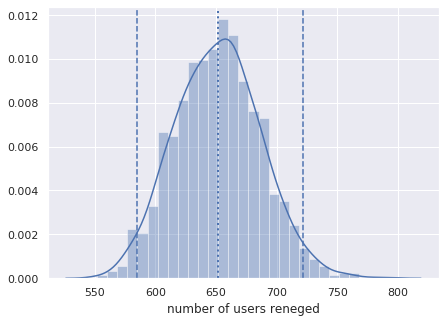

In [19]:
plot_distribution(num_helpseekers_reneged_g_regular, 'num_helpseekers_reneged_g_regular')

In [20]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_reneged_g_regular.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 585.00000
97.5% percentile: 722.00000

mean value: 651.57933


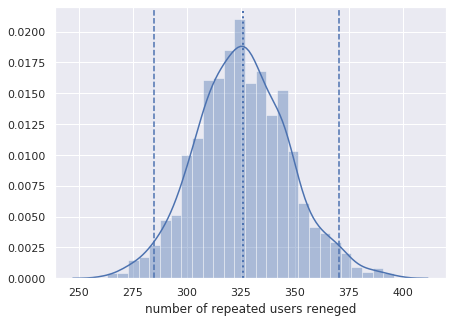

In [21]:
plot_distribution(num_helpseekers_reneged_g_repeated, 'num_helpseekers_reneged_g_repeated')

In [22]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_reneged_g_repeated.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 285.00000
97.5% percentile: 370.52500

mean value: 325.96400


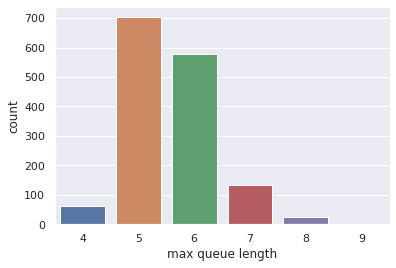

In [23]:
max_queue_length_count = sns.countplot(x='max queue length', data=max_queue_length.to_frame())

max_queue_length_count.get_figure().savefig(f'max_queue_length_count.png', dpi=300, bbox_inches='tight')

In [24]:
queue_exceeded = pd.DataFrame(queue_exceeded, columns=['day_of_week', 'hour', 'queue_length'])

In [25]:
queue_exceeded['hour'] = queue_exceeded['hour'].str.replace('hour:', '').astype(int)

In [26]:
queue_exceeded['day_of_week'].replace({
    'weekday:0': 'Sunday',
    'weekday:1': 'Monday',
    'weekday:2': 'Tuesday',
    'weekday:3': 'Wednesday',
    'weekday:4': 'Thursday',
    'weekday:5': 'Friday',
    'weekday:6': 'Saturday'
}, inplace=True)

In [27]:
queue_exceeded['queue_length'] = queue_exceeded['queue_length'].str.replace('queue_length:', '').astype(int)

In [28]:
queue_exceeded

,day_of_week,hour,queue_length
0,Sunday,0,0
1,Sunday,0,0
2,Sunday,0,0
3,Sunday,0,0
4,Sunday,0,0
...,...,...,...
6363437,Monday,23,2
6363438,Monday,23,1
6363439,Monday,23,1
6363440,Monday,23,2


In [29]:
queue_exceeded['total']=1

In [30]:
totals = queue_exceeded.groupby(
    ['day_of_week', 'hour', 'queue_length']).sum()

In [31]:
totals = totals.reset_index()

In [32]:
totals

,day_of_week,hour,queue_length,total
0,Friday,0,0,72764
1,Friday,0,1,1711
2,Friday,0,2,530
3,Friday,0,3,120
4,Friday,0,4,27
...,...,...,...,...
956,Wednesday,23,4,1160
957,Wednesday,23,5,231
958,Wednesday,23,6,40
959,Wednesday,23,7,12


In [33]:
totals = pd.pivot_table(totals, values='total', columns=['queue_length'],
              index=['day_of_week', 'hour'], aggfunc=np.sum, fill_value=0)

In [34]:
totals_percent = (((totals.T/totals.T.sum()).T)*100)#.round(2)

totals_percent

In [35]:
totals_percent

queue_length              0          1          2         3         4  \
day_of_week hour                                                        
Friday      0     96.812134   2.276477   0.705162  0.159659  0.035923   
            1     94.479000   3.683876   1.388434  0.362033  0.077028   
            2     93.565434   4.620095   1.433432  0.317532  0.058970   
            3     96.689438   2.623388   0.590161  0.084886  0.012127   
            4     98.628992   1.103494   0.239648  0.027866  0.000000   
...                     ...        ...        ...       ...       ...   
Wednesday   19    93.741691   4.724506   1.198976  0.283126  0.046777   
            20    93.633093   4.802613   1.268278  0.244979  0.043382   
            21    86.708101   8.945539   3.196039  0.924892  0.183293   
            22    41.598859  36.587378  16.008650  4.663709  0.954143   
            23    33.701185  36.340993  20.102174  7.228565  2.108938   

queue_length             5         6         7         8    9  
day_of_week hour                                               
Friday      0     0.009313  0.001330  0.000000  0.000000  0.0  
            1     0.009629  0.000000  0.000000  0.000000  0.0  
            2     0.004536  0.000000  0.000000  0.000000  0.0  
            3     0.000000  0.000000  0.000000  0.000000  0.0  
            4     0.000000  0.000000  0.000000  0.000000  0.0  
...                    ...       ...       ...       ...  ...  
Wednesday   19    0.004924  0.000000  0.000000  0.000000  0.0  
            20    0.007656  0.000000  0.000000  0.000000  0.0  
            21    0.037923  0.002107  0.002107  0.000000  0.0  
            22    0.169427  0.017834  0.000000  0.000000  0.0  
            23    0.419969  0.072722  0.021817  0.003636  0.0  

[168 rows x 10 columns]

In [36]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

# modify matplotlib and seaborn settings
# to display Chinese 
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP'] 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['font.weight'] = 'medium'

sns.set(font=['sans-serif'])
sns.set_style('dark',{'font.sans-serif':['Noto Serif CJK JP']})
sns.set_context('talk')

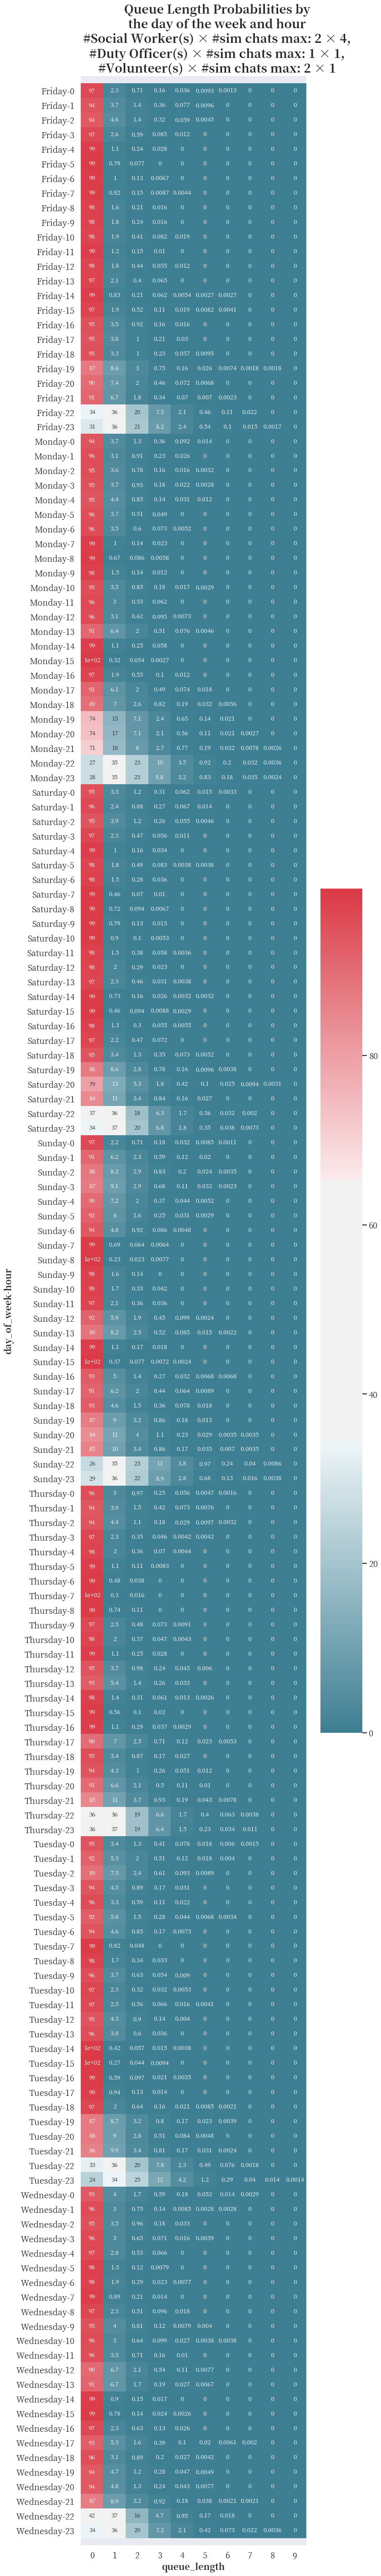

In [37]:
fig, ax = plt.subplots(figsize=(10, 100) )


sns.heatmap(totals_percent, annot=True, ax=ax, annot_kws={"size": 12}, 
    cmap=sns.diverging_palette(220, 10, sep=80, n=255))#.reverse());
fig.suptitle('Queue Length Probabilities by\nthe day of the week and hour\n'
             '#Social Worker(s) × #sim chats max: 2 × 4,\n'
             '#Duty Officer(s) × #sim chats max: 1 × 1,\n'
             '#Volunteer(s) × #sim chats max: 2 × 1',
    fontsize=24, weight='heavy',
    fontweight=1000, y=.9)
plt.subplots_adjust(bottom=0.2)

# workaround from https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

fig.savefig(f'queue_output/Queue_SW_24_DO_11_V_21.png', dpi=300, bbox_inches='tight')

In [ ]:
queue_plot = sns.catplot(col='day_of_week', y='hour', col_wrap=4,
    col_order=['Sunday',
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday'],
    data=queue_exceeded, kind="count",
    height=4, aspect=1);
queue_plot.savefig(f'queue_blowup.png', dpi=300, bbox_inches='tight')

# determine hours counsellors are maxed out

In [ ]:
df2 = pd.DataFrame(num_available_counsellor_processes, columns=['time', 'num_counsellor_processes'])

In [ ]:
from queue_simulation import MINUTES_PER_DAY, DAYS_IN_WEEK, MINUTES_PER_HOUR#, MAX_NUM_SIMULTANEOUS_CHATS

In [ ]:
df2['time_int'] = df2['time'].astype(int)

In [ ]:
df2['current_day_minutes'] = df2['time_int'] % MINUTES_PER_DAY

In [ ]:
df2['weekday'] = (df2['time_int'] / MINUTES_PER_DAY).astype(int) % DAYS_IN_WEEK

In [ ]:
df2['hour'] = (df2['current_day_minutes'] / MINUTES_PER_HOUR).astype(int)

In [ ]:
df2['day_of_week'] = df2['weekday'].replace({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

# Number of instances when one/no counsellor is available (1500 simulations, seed=728, four or less processes)

In [ ]:
process_plot = sns.catplot(col='day_of_week', y='hour', col_wrap=4,
    col_order=['Sunday',
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday'],
    data=df2[df2['num_counsellor_processes']<=2], kind="count",
    height=4, aspect=1);
process_plot.savefig(f'process_plot.png', dpi=300, bbox_inches='tight')

# Number of instances when at least two counsellors are idle (1500 simulations, seed=728, eight or more processes)

In [ ]:
process_plot = sns.catplot(col='day_of_week', y='hour', col_wrap=4,
    col_order=['Sunday',
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday'],
    data=df2[df2['num_counsellor_processes']>=8], kind="count",
    height=4, aspect=1);
process_plot.savefig(f'process_plot_2.png', dpi=300, bbox_inches='tight')